In [17]:
import Pkg

# 格子QCD入門
- 富谷昭夫(大阪国際工科専門職大学, akio@yukawa.kyoto-u.ac.jp)
- 2022/12/25製作開始, 
- 2022/12/31第1版公開, 
- 2023/1/1軽微なタイポを修正, 


このノートブックでは、場の理論および格子QCDの簡単な入門を行います。特に格子QCDの実践的な計算を目標にします。
理論的な話は教科書 (例えば [青木慎也](https://www.amazon.co.jp/%E6%A0%BC%E5%AD%90%E4%B8%8A%E3%81%AE%E5%A0%B4%E3%81%AE%E7%90%86%E8%AB%96-%E3%82%B7%E3%83%A5%E3%83%97%E3%83%AA%E3%83%B3%E3%82%AC%E3%83%BC%E7%8F%BE%E4%BB%A3%E7%90%86%E8%AB%96%E7%89%A9%E7%90%86%E5%AD%A6%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E9%9D%92%E6%9C%A8-%E6%85%8E%E4%B9%9F/dp/4621062433)さんのもの)などに譲り、
あくまで結果を得ることを目的とします。数値計算には、[Julia言語](https://julialang.org/)とJulia 言語で実装された[LatticeQCD.jl](https://github.com/akio-tomiya/LatticeQCD.jl) を用います。

物理学科の平均的な4年生に向けて書いています。解析力学、電磁気学、相対論、量子力学、統計力学あたりの知識を仮定します。場の量子論についても多少知っていると知っていると良いかもしれませんが、仮定はしません。

Julia言語は、FortranやC++の様に高速に動作する言語であり、またPythonの様に書ける比較的新しい科学計算用プログラミング言語です。
Julia言語ついては以下の書籍が参考になります。

- [1週間で学べる! Julia数値計算プログラミング ](https://www.amazon.co.jp/1%E9%80%B1%E9%96%93%E3%81%A7%E5%AD%A6%E3%81%B9%E3%82%8B-Julia%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-KS%E6%83%85%E5%A0%B1%E7%A7%91%E5%AD%A6%E5%B0%82%E9%96%80%E6%9B%B8-%E6%B0%B8%E4%BA%95-%E4%BD%91%E7%B4%80/dp/4065282829)
- [1から始める Juliaプログラミング](https://www.amazon.co.jp/1%E3%81%8B%E3%82%89%E5%A7%8B%E3%82%81%E3%82%8B-Julia%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%80%B2%E8%97%A4-%E8%A3%95%E4%B9%8B/dp/433902905X/ref=asc_df_433902905X/?tag=jpgo-22&linkCode=df0&hvadid=342518373760&hvpos=&hvnetw=g&hvrand=6646809181230697705&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009572&hvtargid=pla-900212121772&psc=1&th=1&psc=1)

# なぜ(素粒子物理で)場の理論が必要か

まず格子QCDというか、QCD、そして場の量子論(よく場の理論と呼ばれる)について簡単に説明しましょう。

素粒子物理は、主に粒子同士を光速に近いスピードでぶつけ、飛び出てきた粒子を見ることで、どういう反応が起きたかを調べるというのが典型的な考察対象になります (もちろんこれだけではないですが)。

ミクロな世界において、物理過程は量子力学に従います。また光速に近いスピードを扱う際には特殊相対論に沿った理論体系であることも必要です。
そのため、素粒子物理の計算は、相対論と量子論の枠組みにしたがう必要があります。そして場の理論はその要請をみたす理論体系です(たとえばWeibergの教科書など参照)。

# QCDとは、格子QCDとは

QCDとは、Quantum Chromo-dynamics の略で、原子核内をクォークというスピン1/2である物質場とグルーオンというスピン1のゲージ場という基本自由度(素粒子)の言葉で記述する場の理論の一種です。

QCDは強い力の基礎理論で、格子QCDは格子上で定義したQCDになります。格子QCDは、素粒子論の勉強を少しでもした人は知っているかもしれませんが主に数値計算によって量子論としての期待値の計算を行います。一方で格子QCDは数値計算だけの手法ではありません。場の理論の(数学的に)うまい定義を与える手法となっています。

# 量子化の手続き

ここでは1粒子の量子力学の量子化の手続きを思い出しておきます。
ラグランジアンからスタートする場合、
1. ラグランジアンを書く
2. 一般化運動量を計算し、ハミルトニアンを書く
3. 量子化条件を課す
の順にすすめます。そして得た量子ハミルトニアンに対して様々な量を計算すれば良いです。

質量1、振動数$\omega=1$という場合、調和振動子のラグランジアンは、
$$
L = \frac{1}{2}\dot{x}^2 - \frac{1}{2}x^2
$$
です。

一般化運動量は、
$$
p=\frac{\partial L}{\partial \dot{x} }=\dot{x}
$$
です。

ルジャンドル変換$H=p\dot x - L$を行うと、
$$
H = \frac{1}{2}p^2 + \frac{1}{2}x^2
$$
を得ます。そして$[x,p]={\rm i}\hbar$と交換関係を課せば量子論を得ます。

# 多体系の量子論
場の理論の雛形となる$N$体の量子力学を考えてみましょう。まずハミルトニアンは、

$$
\hat H = \sum_{j=1}^{N}
\frac{1}{2m} \hat{p}^2_j
+
V(\hat q_1,\cdots).
$$

で与えられます。そして量子化は、

$$
[\hat{q}_j, \hat{p}_k] = {\rm i}\hbar\delta_{jk}
$$

と課すことで行われます。
また全体の最低エネルギー状態は各粒子の最低エネルギー状態のテンソル積で与えられるとすると
わかりやすいかもしれません。

$$
|0\rangle_{\rm tot} = \bigotimes_{j=1}^{N}|0\rangle_j = |0\rangle_1\otimes|0\rangle_2\otimes\cdots
$$

ただし$|\cdot\rangle_j$は$j$番目の演算子$\hat{p}_j$や$\hat{q}_j$などが作用する状態ベクトルです。
(ただし真の基底状態はこの様な積状態でなく、エンタングルしている状態です)。


そして量子論では以下の時間発展を行うと考えるのでした(シュレーディンガー方程式)。

$$
{\rm i}\hbar\frac{d}{dt} |\psi\rangle
=
\hat{H} |\psi\rangle 
$$

そして状態の時間発展はハミルトニアン$\hat H$が陽に時間に依存しない場合、

$$
|\psi(t)\rangle =  {\rm e}^{-{\rm i} \frac{\hat H}{\hbar} t}|\psi(0)\rangle
$$

の様な形式解を持ちます。

物理量は演算子$O$として書かれましたが、ハイゼンベルク描像では、

$$
O(t)=
{\rm e}^{{\rm i} \frac{\hat H}{\hbar} t}
O(0)
{\rm e}^{-{\rm i} \frac{\hat H}{\hbar} t}
$$

のように時間発展を受けます。

以下で見るように、連続時空での場の理論は、この$j$という離散パラメータを連続パラメータに置き換えたものになっています。

# スカラー場を用いた格子理論への導入と虚時間形式

場の量子論といえども、量子論の一種ですので量子化はハミルトニアンで行います。
実スカラー場の古典論は、
$$
S[\phi] = \int d^4 x \left( \frac{1}{2} \sum_{\mu=0}^3 (\partial_{\mu}\phi)(\partial^{\mu}\phi) - V[\phi] \right)
$$
ただし$V[\phi]$はポテンシャルエネルギーに対応する項で、$\phi(x)$の2乗と4乗まで普通考えます。

一般化運動量の定義とルジャンドル変換を量子力学のときと同様に行うと、
以下のように場の理論のハミルトニアンが得られます。
場の演算子を$\hat\phi(x)$ ($\hat{q}_j$に対応、離散パラメータ$j$が連続パラメータ$x$になった)、共役運動量演算子を$\hat\pi(x)$ ($\hat{p}_j$に対応)としてハミルトニアンは、

$$
\hat{H} = \int d^3 x \left(
\frac{1}{2}\hat{\pi}^2(x) + \frac{1}{2} (\nabla\hat{\phi}(x))^2 + V[\hat\phi]
\right)
$$

です。
ただし、$\hat \phi$は場の演算子で時空点$x = (t,\vec{x})$ (4次元空間の各点)ごとに演算子が定義されています。ここでの場の演算子とは直感的には時空各点に調和振動子の昇降演算子の線形結合があると考えても(今の所)問題はありません。
そして
$$
[\hat\phi(t,\vec{x}), \hat\pi(t,\vec{y})] = {\rm i}\hbar \delta(\vec{x}-\vec{y})
$$
という(場の理論版の)交換関係
(同時刻交換関係)で理論が構成できます。
(またハイゼンベルク方程式として場の方程式、自由スカラー場の場合にはクラインゴルドン方程式を得ます)。

難しい話(LSZ簡約公式)に従うと、場の理論では以下の量(とその類似物)が計算できれば散乱断面積(どういう素粒子の反応が起こるかの量)が計算できるという事になっています。

$$
G(x,y) = \langle \Omega| \top\{\hat\phi(x)\hat\phi(y)\}|\Omega\rangle
$$

この$G(x,y) $は2点グリーン関数、もしくは短く2点関数や2点相関関数と呼ばれています。2点、ということは$n$点相関関数($n>2$)もあるということです。
また$\top$は時間順序演算子と呼ばれる演算子で相対論の因果律を守るためのものです。
そして$|\Omega \rangle$は場の量子論のハミルトニアンの最低エネルギー状態で、真空状態と呼ばれます。
この状態は、各時空点に定義されている調和振動子(っぽいもの)の基底状態の(全時空点にわたる)テンソル積で定義されています。
ざっくりイメージをかくと、
$$
\text{(イメージ)}\;\;
|\Omega\rangle_{\rm tot} = \bigotimes_{x\in \mathbb{R}^{3}}|0\rangle_x
$$
という感じです (実際にはこの様な積状態ではなく、エンタングルしているような状態が真の基底状態になっています)。

ファインマンに従えば、このグリーン関数は以下の経路積分形式で書いても等価な結果を返します。
$$
G(x,y) = \frac{1}{Z} \int \mathcal{D}\phi \; {\rm e}^{{\rm i}S[\phi]}\; \phi(x) \phi(y)
$$
ただし右辺の$\phi(x)$はただの関数(古典場)であり、また$Z$は規格化定数です。$S[\phi]$は場$\phi$の古典作用であり、ローレンツ不変な形で書かれます。たとえば、
$$
S[\phi] = \int d^4 x \left( \frac{1}{2} \sum_{\mu=0}^3 (\partial_{\mu}\phi)(\partial^{\mu}\phi) - V[\phi] \right)
$$
の様な格好をしています。
そして$\mathcal{D}\phi$は経路積分測度であり、
$$
\mathcal{D}\phi = \prod_{x\in \mathbb{R}^{1,3}} d\phi(x)
$$
という連続無限次元の多重積分です。なんだかよく分かりませんね。そんなものです。これについては後で少し理解が進みます。

また演算子形式に話を戻します。多体系の量子論と同じく、場の量子論でも状態の時間発展はシュレーディンガー方程式に従います。

$$
{\rm i}\frac{d}{dt} |\psi\rangle
=
\hat{H} |\psi\rangle 
$$
ただし$\hbar=1$の単位系を取りました。

そして状態の時間発展はハミルトニアン$\hat H$が陽に時間に依存しない場合、
$$
|\psi(t)\rangle =  {\rm e}^{-{\rm i}\hat Ht}|\psi(0)\rangle
$$
の様な形式解を持ちます。

ここで少し不思議なことをします。時間発展演算子${\rm e}^{-{\rm i}\hat Ht}$の中の$t$を$-{\rm i}\tau$ ($\tau \in \mathbb{R}$)と形式的に置き換えると、
$$
|\psi(\beta)\rangle = {\rm e}^{-\tau \hat H}|\psi(0)\rangle
$$
という形になります。これは$\tau$を逆温度$\beta$と思ったときには量子統計力学に出てくるボルツマン因子になっています。
ややこしいのですが、$t$を実時間というとき、$\tau$を対比して虚時間といいます。
普通ハミルトニアンは非負の固有値をもちますので、${\rm e}^{-\tau \hat H}$という演算子は
エネルギー固有値を$E>0$と書く場合${\rm e}^{-\tau \hat E}$はノルムを小さくする様に働きます。
何が言いたいかというと、もとの実時間での計算では振動するだけだった状態ベクトルが
発散する方向でなく、収束するように動きます。

虚時間形式では、実時間形式の様な振動が現れず、取り扱いが簡単になっている場合が多いです。また以下でも触れますが、虚時間形式で計算した相関関数があれば、実時間形式の場の理論を復元できます。

余談ですが量子論としてのハミルトニアン$H$を用意し、実時間$t$ではなく虚時間$\tau$の時間発展を行うと、量子統計力学が出てくるわけです(というのは論理が飛躍しており、虚時間に正しい周期性を持ち込まなければ行けません。正しい周期性を持ち込み、上記手法で統計力学を展開するやりかたを松原形式と呼びます)。

虚時間で経路積分を用いた2点関数の計算は、
$dtdxdydz=-{\rm i}d\tau dxdydz$などと形式に代入を行うことで以下のようになることがわかります。

$$
G^{({\rm E})}(x,y) = \frac{1}{Z} \int \mathcal{D}\phi \; {\rm e}^{-S^{({\rm E})}[\phi]} \; \phi(x) \phi(y)
$$

ここで$x$や$y$などの全ての座標は実時間ではなく虚時間の座標になっています。また$G^{({\rm E})}(x,y)$は虚時間でのグリーン関数で、ユークリッドグリーン関数と呼ばれています。なぜユークリッドかというと、もともとはミンコフスキー時空だったものを、時間を虚数にとったせいで計量がユークリッド空間と同じ符号になっているからです。

また$S^{({\rm E})}[\phi]$はユークリッド作用と呼ばれるもので、$d^4 x = d\tau dxdydz$として
$$
S^{({\rm E})}[\phi]
= \int d^4 x \left( \frac{1}{2} \sum_{\mu=1}^4 (\partial_{\mu}\phi)(\partial_{\mu}\phi) + V[\phi] \right)
$$
と、ハミルトニアンと似た格好、つまり運動エネルギーとポテンシャルエネルギーの和として書かれるものです。
ここで注意なのは、虚時間発展だろうが、実時間発展だろうがハミルトニアンは共通で、単に作用の見かけが変わってしまっているという点です。
時間に依存しない量、たとえばハミルトニアンの固有値(物理的には粒子の質量に対応)、はどちらで計算しても同じになります。

系がほぼ古典統計力学の形に書き換わってしまいました。実は場の量子論はある意味で古典統計力学と似ている理論になっています。
この類似性はあとでも使います。

以下では、混乱が生じない限り、ユークリッドをしめす$({\rm E})$を書かないことにし、原則的に虚時間で話を進めることにします。
また経路積分形式で話をすすめます。

難しい話(オスターワルダー・シュレーダーの再構成定理)に従うと、ユークリッド計量(虚時間)でグリーン関数(や$n$点相関関数)を計算しておけば、いつでもターゲットとなる欲しい理論の量、つまり実時間のグリーン関数(や$n$点相関関数)を(原理的には)得ることが出来ます。

一般に虚時間の方が計算が単純であるため、そちらでグリーン関数計算しておき、(適当な仮定の下での解析接続)から実時間に持っていき、最終的に(LSZ簡約公式を用いて)散乱断面積へつなぐ流れになります。

つまり虚時間でのグリーン関数を計算できればよいのですが、どうすればよいのでしょうか。もし$V[\phi]$が2次までしかなければ本質的にガウス積分なので積分出来てしまいます。一方で現実的な問題では$4$次まであることが知られており、このままでは(経路)積分が実行できません。

そこでよく使われるのが摂動論です。これは$4$次の項をテイラー展開してしまう方法で、場の経路積分ではなく、1次元積分で例えるなら以下の計算をすることになります。

$$
\begin{aligned}
\int_{-\infty}^{\infty} {\rm e}^{-\frac{1}{2}x^2-\lambda x^4} 
&=
\int_{-\infty}^{\infty} {\rm e}^{-\frac{1}{2}x^2}{\rm e}^{-\lambda x^4},\\
&=
\int_{-\infty}^{\infty} {\rm e}^{-\frac{1}{2}x^2}\left(\sum_{n=0}^\infty\frac{(-\lambda x^4)^{n}}{n!}\right),\\
&\overset{?}=
\sum_{n=0}^\infty
\frac{ (-\lambda)^{n} }{n!}
\int_{-\infty}^{\infty} {\rm e}^{-\frac{1}{2}x^2}{x^{4n}}
\end{aligned}
$$

本質的には場の理論でも同じ変形をします。

ここで$\overset{?}=$の等号のところで無限和と積分を入れ替えてしまいました。もしこの等号が成立していれば各項毎にガウス積分で評価が出来てしまうのでハッピーなのですが、そうはなりません。この入れ替えは許されておらず、入れ替えたあとの級数は収束しない漸近級数となっています。もし$\lambda$が十分小さければ適当な次数$n$までは$\lambda$以外のところが相対的に小さく、次数を大きくとるたびに近似は改善していきます。
しかしある次数のところで係数の方の大きさが大きくなっていき、ついにはどんどんずれていく、という感じになります。
ちょうどスターリングの公式と同様の現象です。

またこの漸近級数では元の積分の振る舞いを完全に再現できないことも知られています。摂動展開で見落とす効果を総じて非摂動効果とよびます。
非摂動効果は、カイラル対称性の自発的対称性の破れや閉じ込め等の重要な現象に関わっているため、摂動論に頼らないうまい手法が必要となります。

もっといえば、場の量子論の経路積分は、相互作用がある場合(つまり$\lambda$がゼロでないとき)には数学的には上手く定義出来ていません。相互作用がなければガウス積分が(連続)無限個あるだけなので良いのですが、相互作用がある場合にはそもそも積分(測度)の意味がよく分かりません。

そこで出てくるのが格子上の場の理論です。
つまり、離散時空(=格子)の上で場の理論を定義し、その連続極限として(連続時空の)場の理論を特徴づけます。
これはちょうど、有限差分からその極限として微分を定義したり、区分求積法のように有限和から積分を定義するのと対応しています。

ただし、目的としている連続時空の場の理論を得るためには上手い離散化を用いて計算すべきです。たとえば連続理論の作用が持っている対称性はなるべく保っていて欲しいし(量子異常で壊れるべきものは壊しておく必要があります)、保てないなら近似的にも保証しておくべきです。特にあとで述べるようにゲージ対称性を上手く保っておくことでQCDの計算が可能になります。

ここで虚時間のハイゼンベルク描像についてコメントしておきます。演算子$O$の実時間での時間発展は、
$$
O(t) = {\rm e}^{{\rm i}H t}O(0){\rm e}^{-{\rm i} H t}
$$
でしたが虚時間では、$t=-{\rm i}\tau $という形式的な置き換えにより、
$$
O(\tau) = {\rm e}^{H\tau}O(0){\rm e}^{-H \tau}
$$
の様になります。これが虚時間形式での演算子の時間発展になります。

実時間ではユニタリーな時間発展演算子同士がエルミート共役の関係でつながっていましたが
虚時間ではそうなっていないことに注意してください。
つまり、状態$|\psi\rangle$に対し
正の方向への発展が${\rm e}^{-H\tau}|\psi\rangle$、
負の方向への発展が${\rm e}^{H\tau}|\psi\rangle$です。
またつまり、状態$\langle\psi|$に対し
正の方向への発展が、$\langle\psi|{\rm e}^{H\tau}$、
負の方向への発展が$\langle\psi|{\rm e}^{-H\tau}$です。

# 格子上のスカラー場の理論
虚時間形式では、格子状のスカラー場の理論は
$$
S^{\rm cnt}[\phi]
= \int d^4 x \left( -\frac{1}{2} \sum_{\mu=1}^4 \phi(x) \left(\partial_{\mu}\partial_{\mu}\phi(x)\right) 
+\frac{m^2}{2}\phi^2(x)
+\frac{\lambda}{4!}\phi^4(x)
\right)
$$
という作用で書かれます。対応する分配関数は、
$$
Z = \int \mathcal{D}\phi\; {\rm e}^{-S^{\rm cnt}[\phi]} 
$$
です。

格子理論を得るためには、
$a$を離散化間隔(格子間隔, lattice spacing)として$x=na$とおきかえ、
$$
S^{\rm lat}[\phi]
= a^4 \sum_{n} 
\left( -\frac{1}{2} \sum_{\mu=1}^4 \phi(an) \left(\partial_{\mu}\partial_{\mu}\phi\right)_{\rm lat}(an)
+\frac{m^2}{2}\phi^2(an)
+\frac{\lambda}{4!}\phi^4(an)
\right)
$$
のようにします。ここで$n$は4次元格子の座標を表します。また
$\sum_{\mu=1}^4\left(\partial_{\mu}\partial_{\mu}\phi\right)_{\rm lat}(n)$は、
$$
\sum_{\mu=1}^4
\left(\partial_{\mu}\partial_{\mu}\phi\right)_{\rm lat}(an)
=\sum_{\mu=1}^4\frac{1}{a^2}\big[\phi(an+a\hat\mu)+\phi(an-a\hat\mu)-2\phi(an)\big]
$$
と定義されてる離散版の微分(差分)です。また$\hat\mu$は$\mu$方向の単位ベクトルです。

$a\to 0$をとると、作用は連続理論の作用になります。

この離散化に対応して、経路積分測度は、$n$を格子点の座標として
$$
\mathcal{D}\phi = \prod_n d\phi(an)
$$
となります。これは人間にも理解できます。なぜなら、たとえば3次元の重積分のときに$dx_1 dx_2 dx_3$のような積分測度が出てきますが、それと同じく、格子点の数だけ変数$\phi$を積分すれば良いからです。
量子力学の経路積分の導出をよくよく思い返してみると、時間方向を離散化したあとで連続極限をとりますが、それの逆手続きを踏んでいることに対応します。

またこの離散化は、理論に対して紫外カットオフ(=エネルギーに上限)を導入しているのと等価です。

$$
G^{({\rm lat})}(an_1,an_2) = \frac{1}{Z} \int \mathcal{D}\phi \; {\rm e}^{-S^{({\rm lat})}[\phi]} \; \phi(an_1) \phi(an_2)
$$

2点相関関数と同様に4点相関関数も格子上で計算可能です。そして場の量子論では典型的にカットオフを取り除く極限$1/a\to\infty$ (格子の言葉では$a\to0$に対応します)をとると発散が生じます。そこで$a$を0にする極限と同時にラグランジアンに入っている$m^2$と$\lambda$の様なパラメータと場をリスケールすることで
発散を消去します。具体的には(今なら3つの)物理量を一定に保ちながら極限操作を行います。
これをくりこみと呼びます。4次元スカラー場の理論において、
3つのパラメータ($m$と$\lambda$と場のリスケール)だけで全ての発散は
消し去ることができます。

# くりこみと連続極限

格子理論でも同様にくりこみを通じて連続極限が定義されます (これを量子論的な連続極限とも呼ばれます)。
具体的には、離散化が効かない様な長距離で定義される物理量(たとえばパイ中間子などのハドロンの質量)
を一定に保つように、カットオフとラグランジアンに入っているパラメータを同時に動かし、カットオフを取り除きます(なのでパラメータを動かすことはカットオフを動かすことと同義です)。これを以下で見ていきます。

このとき、うまい極限が存在せずに理論が自由理論にしかなれないパターンと、自由理論以外になれるパターンが存在します。
上記で議論していた様なスカラー場の理論は実は連続極限をとると自由場の理論しかなくなると言われています (自明性)。

そして今の所、相互作用を持つ4次元の場の理論として唯一人類が知っているのが、QCDの様な非可換ゲージ理論です。
ただし説明が煩雑になるので、以下の説明でもスカラー場を例に説明していきます。

さて今まで、作用などを次元がある状態で取り扱っていましたが、時空を離散化した理論(= エネルギー・運動量に上限を設けた正則化した理論)では、離散化間隔$a$で作用に現れる量を無次元化することが出来ます。

例えば、$\phi$を次元ありのスカラー場、$\varphi$を次元なしのスカラー場としたとき、$\phi = a^{-1}\varphi$と置き換えると、
$$
S^{\rm lat}[\varphi]
= \sum_{n} 
\left( -\frac{1}{2} \sum_{\mu=1}^4 \varphi(n) \left(\partial_{\mu}\partial_{\mu}\varphi\right)_{\rm lat}(n)
+\frac{(am)^2}{2}\varphi^2(n)
+\frac{\lambda}{4!}\varphi^4(n)
\right)
$$
となります。また
$\left(\partial_{\mu}\partial_{\mu}\varphi\right)_{\rm lat}(n)$は、
$$
\left(\partial_{\mu}\partial_{\mu}\varphi\right)_{\rm lat}(n)
=\sum_{\mu=1}^4\big[\varphi(n+\hat\mu)+\varphi(n-\hat\mu)-2\varphi(n)\big]
$$
となっています。

これは格子間隔 or カットオフの何倍かで物事を測るということですが、$a$依存性が表面的に消えてしましました。このとき、どうやって連続極限をとるのでしょうか。

まず、今の虚時間形式の格子作用が古典統計力学系のハミルトニアンと思えることに注意します。
少しの間だけ、この虚時間格子作用を「ハミルトニアン」と呼ぶことにします。

この表記の場合、$a\to0$の極限は、次のように特徴づけられます。
格子上で整数$n$個だけ離れた点同士の2点相関関数$G(n)$は格子上では、
$$
G(n)\sim \exp(-n/\hat\xi)
$$
とかけます。ただし$\hat\xi$は無次元の相関長で何点先まで相関があるかを示した数で、無次元の「ハミルトニアン」の最低固有値と第一励起状態のギャップの逆数になっています。
場の理論の場合、「ハミルトニアン」の固有値(正確には基底状態の固有値から第一励起状態の固有値との差)は、
格子間隔$a$ [fm]で無次元化した
次元のある質量$m_{\rm phys}$ [MeV]、つまり$am_{\rm phys}$ (無次元)に対応しているので
$$
\frac{1}{a m_{\rm phys}}=\hat{\xi}
$$
の関係を持ちます。
$a\to0$の極限をとるときでも、物理量である$m_{\rm phys}=m_{\rm phys}(a,am,\lambda)$は一定になっていてほしいので、この式はすなわち、
$$
\lim_{a\to0} \frac{1}{a m_{\rm phys}}=\lim_{a\to0} \hat{\xi}(a,am,\lambda)=\infty
$$
となっていて欲しいわけです。
つまり無次元化してある「ハミルトニアン」で記述される統計力学系での相関長が発散していることが必要です。

これは2次(以上)の高次相転移がある点が存在しないと(相互作用の入った系での量子論的、非自明な)連続極限が取れないことを意味しています。
物理量$m_{\rm phys}$を実験での観測値に固定するという条件からパラメータ$m$と$\lambda$と格子間隔$a$は拘束しあっていますので、
この相転移は、$a$の調整ではなく、ラグランジアンに入っているパラメータ$m$と$\lambda$を調整することによって起こされます(このあたりの話はくりこみ群という理論で議論されます)。

以下ではこの表記を使っていきます。

# 格子ゲージ理論

ここでは少しの間だけ実時間の話に戻り、QCDの説明をします。QCDは電磁気学の様なゲージ理論の一種で、非可換群を用いたゲージ理論です。
非可換ゲージ理論に行く前に、量子電気力学(QED)の例を通して、格子上にゲージ場を定義し、それを拡張することで格子上の非可換ゲージ理論を導入します。


相対論的な表示の下で電磁気学では、ゲージ場が本質的な役割を果たします。4元ゲージ場、$A_\mu(x)$、
ただし時間成分$A_0$は静電ポテンシャルで空間成分はベクトルポテンシャル、を
$$
A_\mu(x)\to A_\mu(x) -  \partial_{\mu} \alpha(x)
$$
$\alpha(x)$を適当ななめらかな関数として、上記の様に置き換えをしても電磁気学は不変です。
なぜなら電磁気学を定義している作用
$$
S = -\frac{1}{4}\int d^4 x F_{\mu\nu}F^{\mu\nu}
$$
が不変だからです。ここで$F_{\mu\nu} = \partial_\mu A_\nu - \partial_\nu A_\mu$です。

微分を含んだ変換であるため、時空の離散化とはいかにも相性が悪そうです。離散的な時空の上でゲージ場をゲージ不変な形で導入するのに以下のようなトリックを使います(point splittingと言われる手法です)。

複素スカラー場の2点離れた点$x_1$と$x_2$での相関は、以下の演算子で計算できます。
$$
\phi^*(x_1)\phi(x_2)
$$
ただしこの演算子はスカラー場に対するゲージ変換(座標に依存した位相回転) $\phi(x) \to {\rm e}^{{\rm i}\alpha(x)}\phi(x)$に対して
$$
\phi^*(x_1)\phi(x_2)
\to
\phi^*(x_1)
{\rm e}^{-{\rm i}\alpha(x_1)} {\rm e}^{{\rm i}\alpha(x_2)}
\phi(x_2)
$$
のように不変ではありません。
そこで、ゲージ変換で不変となるように「つじつま合わせ」の演算子$\Omega(x_1,x_2)$を導入します。

すなわち
$$
\phi^*(x_1)\Omega(x_1,x_2)\phi(x_2)\to 
\phi^*(x_1)\Omega(x_1,x_2)\phi(x_2) 
$$
を満たすように変換を受ける非局所的な演算子$\Omega(x_1,x_2)$を導入します。

ゲージ変換のもとで、
$$
\Omega(x_1,x_2) \to {\rm e}^{{\rm i}\alpha(x_1)}\Omega(x_1,x_2) {\rm e}^{-{\rm i}\alpha(x_2)}
$$
となるような$\Omega(x_1,x_2)$が作れれば良いのですができるのでしょうか。

これはよく知られていて、
$$
\Omega(x_1,x_2) = \exp[{\rm i}\int_{x_1}^{x_2} A_\mu(x)dx]
$$
と取れば良いことが知られています。

この演算子は以下のようにゲージ変換をうけます。

$$
\Omega(x_1,x_2) 
\to \exp[{\rm i}\int_{x_1}^{x_2} (A_\mu(x)-\partial_\mu \alpha(x))dx ]
= \exp[{\rm i}\int_{x_1}^{x_2} A_\mu(x) dx- {\rm i}\alpha(x_2)+ {\rm i}\alpha(x_1) ]
= 
{\rm e}^{{\rm i}\alpha(x_1)}
\Omega(x_1,x_2)
{\rm e}^{-{\rm i}\alpha(x_2)}
$$

この非局所的な演算子$\Omega(x_1,x_2) $をウィルソンライン (ウィルソン・シュウィンガー積分など)と呼びます。

$x_1$と$x_2$が格子間隔$a$だけ離れている場合でも、ゲージ不変な場をいれて、
$$
\phi^*(x_1)\phi(x_1+a\hat\mu)
\to
\phi^*(x_1)
{\rm e}^{{\rm i}a A_\mu(x)}
\phi(x_1+a\hat\mu)
$$
ただし$\hat\mu$は$\mu$方向の単位ベクトルとしました。

$$
u_\mu(x) = {\rm e}^{{\rm i}a A_\mu(x)}
$$
をリンク変数と呼びます。

天下り的ですが、以下のloop (輪っか)状に定義された$u_\mu$を使った演算子は、ゲージ変換に対して不変になります。
$$
u_{\mu\nu}(x) = u_{\mu}(x)u_{\nu}(x+a\hat\mu)u^*_{\mu}(x+a\hat\nu)u^*_{\nu}(x)
$$
これは、それぞれの$u_\mu$に対してゲージ変換を同時に施すことにより確認可能です。

さらに、この演算子を$u_\mu(x)={\rm e}^{\rm i a A_\mu(x)}$とおいて$a$でテイラー展開すると、以下を得ることが出来ます。
$$
\operatorname {Re}
u_{\mu\nu}(x) = - \frac{1}{4} a^4 F^2_{\mu\nu}(x)+O(a^5)
$$
右辺の第一項は電磁場の作用に含まれている演算子です。最後の後は実は$O(a^6)$となることを示せます。

これを使うと、$x=an$ (ただし$n$は4次元立方格子の座標)として以下のように格子上のゲージ不変な作用を作ることが出来ます。
$$
S[u] = \beta\sum_{n}\sum_{\mu=1}^4 \big(1- \operatorname {Re}u_{\mu\nu}(n) \big)
$$
ただし$\beta = 1/g^2$ (結合定数の逆数)、そして
$$
u_{\mu\nu}(n) = u_{\mu}(n)u_{\nu}(n+\hat\mu)u^*_{\mu}(n+\hat\nu)u^*_{\nu}(n)
$$
です。これは$a$が小さいと思うと、$S[u] = \frac{1}{4}\int d^4x \sum_{\mu\nu} F^2_{\mu\nu} + O(a^6)$の様に振る舞うため、
この格子作用で計算し、$a$が小さい極限をとれれば、連続理論と同じ期待値を計算することができるでしょう。

すなわち、格子上の量子電気力学で演算子$O$の期待値を得ようと思うと、以下の計算となります。
$$
\langle O \rangle =\frac{1}{Z}\int \mathcal{D}u\; O[u] {\rm e}^{-S[u]}
$$
(ただしここまでの議論には電子・陽電子の量子効果を無視して議論しています)。
ただし、
$$
\mathcal{D}u=\prod_{n}\prod_{\mu=1}^4 du_{\mu}(n)
$$
であり、$ du_{\mu}(n)$はゲージ変換の下で不変な積分測度です(ハール測度といいます)。

QCDはこの式の拡張によって議論できます。

# 非可換ゲージ理論

非可換の場合でもゲージ場に対する作用の作り方は同様です。ここでは$N_c$を自然数として$SU(N_c)$ゲージ理論を
$$
S[U] = \beta\sum_{n}\sum_{\mu=1}^4 \big(1-\operatorname {Re}\operatorname{tr} U_{\mu\nu}(n) \big)
$$
ただし$\beta = 2N_c/g^2$ (結合定数の逆数)、そして
$$
U_{\mu\nu}(n) = U_{\mu}(n) U_{\nu}(n+\hat\mu) U^\dagger_{\mu}(n+\hat\nu) U^\dagger_{\nu}(n)
$$
ただし$U_{\mu}(n)\in SU(N_c)$です。

すなわち、格子上の量子版の非可換ゲージ理論で演算子$O$の期待値を得ようと思うと、以下の計算となります。
$$
\langle O \rangle =\frac{1}{Z}\int \mathcal{D}U\; O[U] {\rm e}^{-S[U]}
$$
ただし、
$$
\mathcal{D}U=\prod_{n}\prod_{\mu=1}^4 dU_{\mu}(n)
$$
であり、$ dU_{\mu}(n)$はゲージ変換の下で不変な積分測度です。

くりこみ群の考え方を使うと格子ゲージ理論では、$\beta$と格子間隔$a$が連動しており、$\beta$が大きいと小さな$a$で計算していることに対応します。
これはあとの数値計算で使います。

---

# 格子QCD
QCDは、$N_c=3$の非可換ゲージ理論にクォークを結合した理論です。
(追記予定)

格子QCDでは、以下の形で期待値を計算します。
$$
\langle O \rangle =\frac{1}{Z}\int \mathcal{D}U\; O[U] {\rm e}^{-S[U]} \det (D+m)^2.
$$
ただし、
$$
S[U] = \beta\sum_{n}\sum_{\mu=1}^4 \big(1-\operatorname {Re}\operatorname{tr} U_{\mu\nu}(n) \big)
$$
であり、
$$
U_{\mu\nu}(n) = U_{\mu}(n)U_{\nu}(n+\hat\mu)U^\dagger_{\mu}(n+\hat\nu)U^\dagger_{\nu}(n)
$$
そして$U_{\mu}(n)$は$3\times 3$の特殊ユニタリー行列(SU(3))です。$\mu=1,2,3,4$は方向、$n$は4次元の格子の座標を表すため、$U_{\mu}(n)$は各ボンド(リンクと呼ぶ)に定義されています。

見慣れない$ \det (D+m)^2$の部分は(ここでは説明しませんが)クォークの量子効果を表す部分になります(Dは離散化した共変微分でディラック演算子と呼ばれます)。$m$はクォーク質量です。
これが厳密なQCDの定義になります。

----

以下では、格子QCDの計算をつかって、パイ中間子の質量を実際に計算してみましょう。

まず数値計算する場合、有限の箱の中の系を計算することになります。それは空間方向だけでなく虚時間方向もです。通常周期境界条件をとります(有限温度QCDの計算を行う場合には松原形式の処方に従い、フェルミオンは虚時間方向に対して反周期境界条件を取ります。わからない人は気にしないでも良いです)。
ただし、計算が煩雑になるため、以下では虚時間方向は(最低励起状態の逆数より)十分大きいとして、周期性については適当にごまかします。

虚時間のハイゼンベルク描像では、演算子$O$の時間発展は、
$$
O(\tau) = {\rm e}^{H\tau}O(0){\rm e}^{-H \tau}
$$
の様になるのでした。

真空中でのパイ中間子の2点相関関数は、真空状態を$|\Omega\rangle$としたとき$
\langle\Omega| \pi(\tau,\vec{x})\pi(0,\vec{0}) |\Omega\rangle
=\langle \pi(\tau,\vec{x})\pi(0,\vec{0}) \rangle$
とかけますが、ここでは空間和を取った以下を考えましょう (これはフーリエ変換して、$\vec p=0$を見ているのと等価なので
運動量0への射影と言われます)。

$$
G(\tau)
=
\sum_{\vec{x}}
\langle \pi(\tau,\vec{x})\pi(0,\vec{0}) \rangle
=
\sum_{\vec{x}}
\langle \Omega| \pi(\tau,\vec{x})\pi(0,\vec{0}) |\Omega\rangle
$$
そしてこれは、虚時間発展演算子の定義から以下の様になります。
$$
G(\tau)
=
\sum_{\vec{x}}
\langle \Omega|{\rm e}^{H\tau} 
{\rm e}^{{\rm i} \vec{P}\vec{x}}
\pi(0,\vec{0})
{\rm e}^{-{\rm i} \vec{P}\vec{x}}
{\rm e}^{-H \tau}
\pi(0,\vec{0}) 
|\Omega\rangle
$$
ただし$P$は運動量演算子です。
真空のエネルギーがゼロ、運動量もゼロであること使うと、
$$
G(\tau)
=
\sum_{\vec{x}}
\langle \Omega|
\pi(0,\vec{0})
{\rm e}^{-{\rm i} \vec{P}\vec{x}}
{\rm e}^{-H \tau}
\pi(0,\vec{0}) 
|\Omega\rangle
$$
となります。

パイ中間子の場の演算子は$\pi(x)$と書かれます。そしてパイ中間子のハミルトニアンの固有状態で張る完全系は、
$$
1=\sum_{\alpha}\int \frac{d^3 p }{(2\pi)^3} \frac{1}{2 E_{\alpha}(\vec{p})}|\vec{p},\alpha\rangle \langle \vec{p}, \alpha|
$$
とかけます。格子系、そして有限の箱の中では積分ではなく離散的な有限和になるわけですが気にせずこの様に書いておきましょう。
また$\alpha$は励起状態などを区別するラベルです。
パイ中間子のハミルトニアンを$H$と書いたとき、
$$
H |\vec{p},\alpha\rangle = E_{\alpha}(\vec{p})|\vec{p},\alpha\rangle 
$$
そして$E_{\alpha}(\vec{p}) = \sqrt{\vec{p}^2 + m_\alpha^2}$です(正確には格子上では$1+O(ap)$が掛かりますが無視します)。

パイ中間子の完全系を挟むと、

$$
\begin{align}
G(\tau)
&=
\sum_{\vec{x}}
\sum_{\alpha}\int \frac{d^3 p }{(2\pi)^3} 
\langle \Omega|
\pi(0,\vec{0})
{\rm e}^{-{\rm i} \vec{P}\vec{x}}
{\rm e}^{-H \tau}
|\vec{p},\alpha\rangle
\frac{1}{2 E_{\alpha}(\vec{p})}
\langle \vec{p}, \alpha|
\pi(0,\vec{0}) 
|\Omega\rangle,\\
&=
\sum_{\vec{x}}
\sum_{\alpha}\int \frac{d^3 p }{(2\pi)^3} 
{\rm e}^{-{\rm i} \vec{p}\vec{x}}
\langle \Omega|
\pi(0,\vec{0})
|\vec{p},\alpha\rangle
\frac{{\rm e}^{-E_\alpha(\vec{p}) \tau}}{2 E_{\alpha}(\vec{p})}
\langle \vec{p}, \alpha|
\pi(0,\vec{0}) 
|\Omega\rangle,\\
&=
\sum_{\alpha}\int \frac{d^3 p }{(2\pi)^3} 
(2\pi)^3
\delta(\vec{p})
\langle \Omega|
\pi(0,\vec{0})
|\vec{p},\alpha\rangle
\frac{{\rm e}^{-E_\alpha(\vec{p}) \tau}}{2 E_{\alpha}(\vec{p})}
\langle \vec{p}, \alpha|
\pi(0,\vec{0}) 
|\Omega\rangle,\\
&=
\sum_{\alpha}
\frac{{\rm e}^{-m_\alpha \tau}}{2 m_{\alpha}}
|
\langle \vec{0}, \alpha|
\pi(0,\vec{0}) 
|\Omega\rangle|^2,
\end{align}
$$

そして$|Z_\alpha|^2 = |
\langle \vec{0}, \alpha|
\pi(0,\vec{0}) 
|\Omega\rangle|^2$とおき、また$\alpha = 0$の状態が$\alpha=1$の状態よりエネルギーが低いことを仮定すると、

$$
G(\tau)
=
\frac{|Z_0|^2}{2 m_{0}} {\rm e}^{-m_0 \tau}+ \cdots
$$

を得ます。原点から離れると$1/m_0$を減衰率として指数関数的に相関が減衰していきます。

虚時間方向が長さ$T$と有限で、さらに周期境界条件が課されている場合には、$T$側から原点への寄与も含め
$$
G(\tau) \sim {\rm e}^{-m_0 (T-\tau)} + {\rm e}^{-m_0 \tau}
$$
という結果を得ます。

一方で場の理論でのディラック場に対する経路積分の知識を使うと、2フレーバーQCDでは、パイ中間子の2点相関関数はグルーオン場$U$の経路積分を用いて
$$
\langle \pi(x)\pi(y)\rangle \propto 
\int \mathcal{D}U 
{\rm e}^{-S[U]}
\operatorname{tr}\left[\gamma_5
\left[\frac{1}{D[U]+m}\right]_{xy}
\gamma_5
\left[\frac{1}{D[U]+m}\right]_{yx}
\right]
\det(D[U]+m)^2
$$
となります。ただし${\rm tr}$はカラーとスピノル成分に対するトレースを意味していています。$D$はディラック演算子と呼ばれる(離散時空の添字を持った巨大な)行列で、クォークに対する共変微分を離散化したものです。また$m$はアップクォークとダウンクォークの質量の平均です。この右辺の経路積分を数値計算し、${\rm e}^{-m_0\tau}$と比較することで、$m_0$をパイ中間子の質量と同定し、求めるという作戦です。

以下では実際に$G(\tau)$を格子QCDの数値計算を通じてもとめ、パイ中間子の質量を求めてみます。

---

# マルコフ連鎖モンテカルロ法

以下の計算では、マルコフ連鎖モンテカルロ法に基づき、パイ中間子の相関関数を計算します。

マルコフ連鎖モンテカルロ法、特にその一種である熱浴法を説明するために、
$s_n=\pm1$として
$$
H[s] = -s_1 s_2-s_2 s_3-s_3 s_4-s_4 s_1
$$
という4サイトのイジング模型を考えてみます。
経路積分に対応する状態和$\sum_{s_1=\pm1}\sum_{s_2=\pm1}\sum_{s_3=\pm1}\sum_{s_4=\pm1}$は$2^4=16$項です。

逆温度を$\beta$として、$(s_1,s_2,s_3,s_4)$という配位の同時確率は、

$$
p(s_1,s_2,s_3,s_4) = {\rm e}^{-\beta H[s]}/Z
$$

です。ただし

$$
Z = \sum_{s_1=\pm1}\sum_{s_2=\pm1}\sum_{s_3=\pm1}\sum_{s_4=\pm1}{\rm e}^{-\beta H[s]}
$$

です。

$s_2,s_3,s_4$が決まっているときに$s_1$の確率は条件付き確率で、

$$
p(s_1|s_2,s_3,s_4)
=\frac{p(s_1,s_2,s_3,s_4)}{p(s_2,s_3,s_4)}
=\frac{p(s_1,s_2,s_3,s_4)}{\sum_{s_1=\pm1} p(s_1,s_2,s_3,s_4)}
=\frac{{\rm e}^{\beta (s_1 s_2+s_2 s_3+s_3 s_4+s_4 s_1) }}{
\sum_{s_1=\pm1}{\rm e}^{\beta (s_1 s_2+s_2 s_3+s_3 s_4+s_4 s_1) }
}
=\frac{{\rm e}^{\beta (s_1 s_2+s_4 s_1) }}{
\sum_{s_1=\pm1}{\rm e}^{\beta (s_1 s_2+s_4 s_1) }
}
%
=\frac{{\rm e}^{\beta (s_1 s_2+s_4 s_1) }}{
{\rm e}^{\beta ( s_2+s_4 ) }
+
{\rm e}^{-\beta ( s_2+s_4 ) }
}
$$

となります。局所的なハミルトニアンの場合、隣接部分にしか確率がよりません。
今の場合、$s_1$の生起確率は$s_2$と$s_4$にのみ依っています。なので$p(s_1|s_2,s_3,s_4)=p(s_1|s_2,s_4)$と書きましょう。

$s_2=s_4 = 1$のときに$s_1$は、

$$
p(s_1|s_2=1,s_4=1)
=\frac{{\rm e}^{\beta 2s_1 }}{
{\rm e}^{\beta 2 }
+
{\rm e}^{-\beta 2 }
}
$$

と与えられ、$s_1=1$となる確率は、

$$
p(s_1=1|s_2=1,s_4=1)
=\frac{{\rm e}^{2\beta}}{
{\rm e}^{\beta 2 }
+
{\rm e}^{-\beta 2 }
}
$$

となります。

この例を見ると、$s_1$を確率的に生成するには$s_2$と$s_4$が決まっていれば、条件付き確率をもちいて$s_1=1$か$s_1=-1$かを決めれます。
同様に$s_2$を確率的に生成するには$s_1$と$s_3$が決まっていれば同様に可能です。
1つのスピンを決める際に周りのスピンを熱浴とみなしてスピンを確率的にきめるのでこの手法を熱浴法(heatbath)と言います。

ではどういうスピン配位からスタートすれば良いでしょうか。
実は任意のスピン配位からスタートしても良いことが知られています。
もう少しきちんというと、任意のスピン配位を用意し、そして上記条件付き確率を用いて全てのスピンを順々に更新し、別のスピン配位を得て、
何度も同手順を繰り返して多数のスピン配位を作り出します。$i番目の$スピン配位を$s^{(i)}$と呼ぶことにすると、
期待値

$$
\langle O\rangle = 
\frac{1}{Z}\sum_{s_1=\pm1}\sum_{s_2=\pm1}\sum_{s_3=\pm1}\sum_{s_4=\pm1}{\rm e}^{-\beta H[s]}O[s]
$$

は、配位の数を$N$個として

$$
\langle O\rangle = \lim_{N\to \infty} \frac{1}{N}\sum_{i=1}^N O[s^{(i)}]
$$

と計算できます。このような手法を一般にマルコフ連鎖モンテカルロ法と言います。

実際上は、$N$を無限にとれないため、

$$
\langle O\rangle =\frac{1}{N}\sum_{i=1}^N O[s^{(i)}] + \mathcal{O}\big(\frac{1}{\sqrt{N}}\big)
$$

と評価されます。また初期配位の依存性を消すため、最初のいくつかの配位は捨てる必要があります(熱化時間と呼びます)。

上記に示した熱浴法はゲージ理論に対しても使用可能ですが、クォークのループ効果は非局所的なためクォークのループ効果を取り込むときには熱浴法は使えません。以下ではクォークのループ効果$det(d+m)^2$を無視してゲージ場に対して熱浴法を用いて計算を行っていきます。

(クォークの量子効果を取り込みながら計算を行うHMC(ハイブリッドモンテカルロ)はLatticeQCD.jlでも使えるデファクトスタンダードな厳密手法ですが非常に計算が重いのでこのノートブックでは取り扱いません。)

---
実際の計算パートです。

In [1]:
# Juliaのバージョンチェック
versioninfo()

Julia Version 1.8.4
Commit 00177ebc4fc (2022-12-23 21:32 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 16 virtual cores
Environment:
  JULIA_GPG = 3673DF529D9049477F76B37566E3C7DC03D6E495
  JULIA_VERSION = 1.8.4
  JULIA_PATH = /usr/local/julia
  JULIA_PROJECT = @.


格子QCDパッケージ、LatticeQCD.jl をダウンロードします。

In [2]:
using Pkg
#@time Pkg.add(url="https://github.com/akio-tomiya/LatticeQCD.jl") # 最新版の場合
Pkg.add("LatticeQCD") # 安定版

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/work/Project.toml`
  No Changes to `/work/Manifest.toml`


LatticeQCD.jl をロードします。

In [3]:
using LatticeQCD

以下がパラメータの設定です。

格子の大きさは、$L=6\times 6\times 6\times 12$で、ゲージ結合定数$g$は
$6/g^2 = \beta = 5.7$と取ります。
計算時間を節約するため、ここではクエンチ近似(真空中のクォークループを無視する近似、シークォークを無視する)を行います。

パイ中間子はフェルミオンであるアップクォークとダウンクォークの結合状態なので、フェルミオン質量も入力する必要があります。
格子上のフェルミオンは色々と定式化があるのですが、ここでは標準的なウィルソンクォークをつかい、無次元化した質量$am_q$は
$1/(2(am_q+4))=0.16$と取っておきます (↓のセルのhopというのがこのパラメータに対応します)。

(わかっている人向けの注意: ここでウィルソンクォークはカイラル対称性を明示的に壊しています。これはニールセン二宮の定理から要求されることです。そのためラグランジアンに入っているクォーク質量$m_q$と物理的なクォーク質量の関係は連続理論の様に、比例する様に取れません。ここでは加法的なくりこみにより質量0の点がずれています。このとき質量0のパラメータ点は、Ward-Takahashi恒等式を通じて定義されています。)

全体で151個の配位(``system["Nsteps"] = 151``)
を作りますが、最初の100個を捨てます(``system["Nthermalization"] = 100``)。

In [4]:
# - - parameters - - - - - - - - - - - 
# Physical setting 
system = Dict()
system["L"] = (6, 6, 6, 12)
system["β"] = 5.7
system["NC"] = 3
system["Nthermalization"] = 100
system["Nsteps"] = 151
system["initial"] = "cold"
system["initialtrj"] = 1
system["update_method"] = "Heatbath"
system["useOR"] = true
system["numOR"] = 1
system["Nwing"] = 1
	
# Physical setting(fermions)
system["quench"] = true
system["Dirac_operator"] = nothing
system["BoundaryCondition"] = [1, 1, 1, -1]
	
# System Control # direcotry for measurements.
system["log_dir"] = "./logs"
system["logfile"] = "Heatbath_L06060612_beta5.7_quenched.txt"
system["saveU_dir"] = ""
system["saveU_format"] = nothing
system["saveU_every"] = 100000
system["verboselevel"] = 2
system["randomseed"] = 111
measurement = Dict()
measurement["measurement_basedir"] = "./measurements"
measurement["measurement_dir"] = "Heatbath_L06060612_beta5.7_quenched"

	
# parameter for HMC (not used)
md = Dict()
cg = Dict()
md["SextonWeingargten"] = false
md["N_SextonWeingargten"] = 4
md["MDsteps"] = 8
md["Δτ"] = 1/md["MDsteps"] 
cg["eps"] = 1.0e-19
cg["MaxCGstep"] = 3000
	
# Action parameter for SLMC (not used)
actions = Dict()
actions["use_autogeneratedstaples"] = false
actions["couplingcoeff"] = Any[]
actions["couplinglist"] = Any[]
	
# 測定する物理量の設定
measurement["measurement_methods"] = Dict[ 
  Dict{Any,Any}("methodname" => "Pion_correlator",
    "eps" => 1.0e-16, # 本来は1.0e-19 にすべきだがデモ用で甘めの設定になっている。
    "fermiontype" => "Wilson",
    "smearing_for_fermion" => "nothing",
    "r" => 1,
    "measure_every" => 10,
    "hop" => 0.16, #1/(4+am_q). 大きいとクォーク質量は軽くなる。
    "MaxCGstep" => 3000
  ),
  Dict{Any,Any}("methodname" => "Polyakov_loop",
    "measure_every" => 1
  ),
  Dict{Any,Any}("methodname" => "Plaquette",
    "measure_every" => 1
  )
]
staggered=Dict() #not used
# - - - - - - - - - - - - - - - - - - -
my_QCD_parameter = make_parameters(system,actions,md,cg,measurement,staggered=staggered);

次を実行すると、上記のパラメータに従って格子ゲージ配位を生成します。
およそ<font color="red">10分ほど</font>かかります。

In [5]:
@time run_LQCD(my_QCD_parameter);

Heatbath will be used
# - - parameters - - - - - - - - - - - 
# Physical setting 
system["L"] = (6, 6, 6, 12)
system["β"] = 5.7
system["NC"] = 3
system["Nthermalization"] = 100
system["Nsteps"] = 151
system["initial"] = "cold"
system["initialtrj"] = 1
system["update_method"] = "Heatbath"
system["useOR"] = true
system["numOR"] = 1
system["Nwing"] = 1
	
# Physical setting(fermions)
system["quench"] = true
system["Dirac_operator"] = nothing
wilson["Clover_coefficient"] = 0
wilson["hop"] = 0
staggered["Nf"] = 0
staggered["mass"] = 0
system["BoundaryCondition"] = [1, 1, 1, -1]
	
# System Control
system["log_dir"] = "./logs"
system["logfile"] = "Heatbath_L06060612_beta5.7_quenched.txt"
system["saveU_dir"] = ""
system["saveU_format"] = nothing
system["saveU_every"] = 100000
system["verboselevel"] = 2
system["randomseed"] = 111
measurement["measurement_basedir"] = "./measurements"
measurement["measurement_dir"] = "Heatbath_L06060612_beta5.7_quenched"
	
# HMC related
md["Δτ"] = 0.125
md["Sexton

# 解析

LatticeQCD.jl では、↑で設定したとおり、mesurements 以下のディレクトリに
測定した物理量がテキスト形式で保存されています。

Julia のノートブックでは、;から始まるコマンドはシェルコマンドとして実行されます。

In [6]:
;ls -ltr measurements/Heatbath_L06060612_beta5.7_quenched

total 24
-rw-r--r--  1 atelier  staff  1524 Jan  8 16:25 Pion_correlator.txt
-rw-r--r--  1 atelier  staff  2741 Jan  8 16:25 Polyakov_loop.txt
-rw-r--r--  1 atelier  staff  1551 Jan  8 16:25 Plaquette.txt


シェルコマンドを用いず Julia のコードだけで完結させることもできます。

In [7]:
readdir("measurements/Heatbath_L06060612_beta5.7_quenched")

3-element Vector{String}:
 "Pion_correlator.txt"
 "Plaquette.txt"
 "Polyakov_loop.txt"

catコマンドでファイルを見てみる。

In [8]:
;cat measurements/Heatbath_L06060612_beta5.7_quenched/Pion_correlator.txt

100 122.64390360089925 1.2119501202138467 0.41158816202302007 0.20166344914952053 0.12560707662722256 0.08330580240027086 0.059584388502089844 0.06227169065785462 0.09733252724213266 0.22324719008020186 0.6337095914819533 1.4040402598303092 #pioncorrelator
110 125.94953724880784 1.3062747406236344 0.592900267296396 0.4418171115128453 0.28263184643307304 0.17441110512608443 0.1156292437615585 0.09304328698755059 0.11841875460171934 0.2262208197126299 0.5607671744271081 1.2508288173706341 #pioncorrelator
120 125.19523932886433 1.147901795833749 0.5616703220221309 0.2883861892437507 0.14311287457450098 0.06922618510740158 0.0340594626805337 0.03591169403088704 0.06730241253739108 0.18907827610711472 0.5002000649243878 1.1347656017279055 #pioncorrelator
130 123.17170073852617 1.9732815822753058 0.7901541107901762 0.2674540557549738 0.12215080553272517 0.07111650784625632 0.04824530669687043 0.05013865037050879 0.07639287100306748 0.19965411362822447 0.5233700267558694 1.5152938150415078 #p

Julia の `run` 関数を通しででも確認できる。

In [9]:
run(`cat measurements/Heatbath_L06060612_beta5.7_quenched/Pion_correlator.txt`);

100 122.64390360089925 1.2119501202138467 0.41158816202302007 0.20166344914952053 0.12560707662722256 0.08330580240027086 0.059584388502089844 0.06227169065785462 0.09733252724213266 0.22324719008020186 0.6337095914819533 1.4040402598303092 #pioncorrelator
110 125.94953724880784 1.3062747406236344 0.592900267296396 0.4418171115128453 0.28263184643307304 0.17441110512608443 0.1156292437615585 0.09304328698755059 0.11841875460171934 0.2262208197126299 0.5607671744271081 1.2508288173706341 #pioncorrelator
120 125.19523932886433 1.147901795833749 0.5616703220221309 0.2883861892437507 0.14311287457450098 0.06922618510740158 0.0340594626805337 0.03591169403088704 0.06730241253739108 0.18907827610711472 0.5002000649243878 1.1347656017279055 #pioncorrelator
130 123.17170073852617 1.9732815822753058 0.7901541107901762 0.2674540557549738 0.12215080553272517 0.07111650784625632 0.04824530669687043 0.05013865037050879 0.07639287100306748 0.19965411362822447 0.5233700267558694 1.5152938150415078 #p

In [10]:
Pkg.add("CSV")
Pkg.add("DataFrames")

LoadError: UndefVarError: Pkg not defined

In [11]:
using CSV
using DataFrames

いまロードしたパッケージをつかって、パイ中間子の相関関数が入ったファイル(テキスト/csvファイル)を開きます。

In [12]:
dir = "./measurements/Heatbath_L06060612_beta5.7_quenched/"
file= "Pion_correlator.txt"
file_loc = dir*file # Juliaでは文字列の結合は*
df = CSV.read(file_loc, DataFrame, header=0)[2:end,2:end-1]
df

Row,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,125.95,1.30627,0.5929,0.441817,0.282632,0.174411,0.115629,0.0930433,0.118419,0.226221,0.560767,1.25083
2,125.195,1.1479,0.56167,0.288386,0.143113,0.0692262,0.0340595,0.0359117,0.0673024,0.189078,0.5002,1.13477
3,123.172,1.97328,0.790154,0.267454,0.122151,0.0711165,0.0482453,0.0501387,0.0763929,0.199654,0.52337,1.51529
4,123.727,1.36273,0.47177,0.229584,0.122396,0.0802896,0.0685524,0.0887882,0.158659,0.274508,0.480319,1.11615
5,127.945,1.39256,0.657535,0.294791,0.153441,0.0883349,0.055271,0.0673066,0.145092,0.320037,0.649952,1.8911


In [13]:
Ndat = size(df, 1)
Nt = size(df, 2);
println("データ数は、$Ndat で、虚時間方向はNt=$Nt")

データ数は、5 で、虚時間方向はNt=12


統計処理のため、Statistics パッケージをロードします。

In [14]:
using Statistics

パイ中間子のデータを平均します。また標準誤差(統計誤差)も調べておきます(詳しい人向けの注。ここで配位間の自己相関は無視しているため、誤差が過小評価されている。実際の計算の際にはジャックナイフ法などで自己相関の効果も取り込む。)。

In [15]:
Gt = mean.(eachcol(df));
Gt_err=std.(eachcol(df))/sqrt(Ndat-1);

そして測定したパイ中間子の2点相関関数をプロットするために以下のパッケージをロードします。

In [16]:
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/work/fork/introlqcd/Project.toml`
  No Changes to `~/work/fork/introlqcd/Manifest.toml`


2点相関関数をグラフの見ておきます。

In [18]:
using Plots
xax = 0:(Nt-1) ;

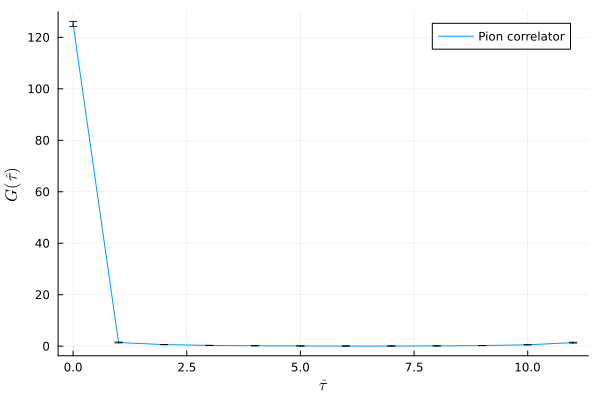

In [19]:
plot(xax,
    Gt, 
    label="Pion correlator",
    xlabel=raw"$\hat\tau$",
    ylabel=raw"$G(\hat\tau)$",
    yerror=Gt_err)

ここで$\hat \tau$は無次元化した虚時間座標です。縦軸のlog を取り、片対数グラフでも見ておきます。

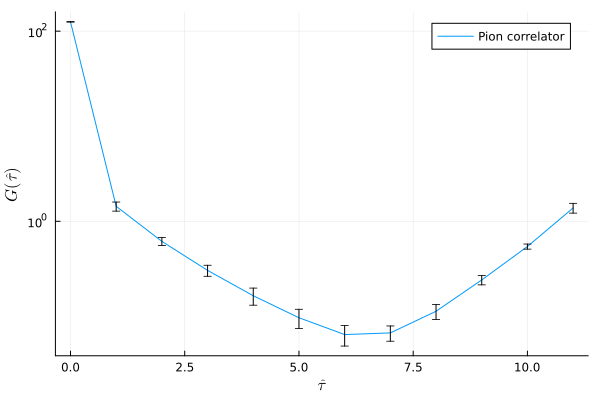

In [20]:
plot(xax,
    Gt, 
    label="Pion correlator",
    xlabel=raw"$\hat\tau$",
    ylabel=raw"$G(\hat\tau)$",
    yerror=Gt_err,
    yscale=:log10)

質量$\hat m=ma$のスカラー粒子の(運動量0射影した)2点相関関数は、虚時間方向の長さを$T/a$として$T/a\gg \hat\tau \gg1$のとき、
$$
G(\hat\tau) \sim {\rm e}^{-\hat m \hat\tau}
$$
であったことを思い出します。ここで$m$は見ている相関関数の一番下の(実時間での)極に対応する質量です。
つまり、この片対数グラフの傾きが質量に対応します。

この式を上手く使うと、以下の有効質量(無次元)を定義することができます。
$$
am_{\rm eff}(\hat\tau) = -\ln \frac{G(\hat\tau+1)}{G(\hat\tau)}
$$
これを見てみて、一定とみなせる$\hat\tau \gg 1$のところを質量と呼ぶことにしよう。

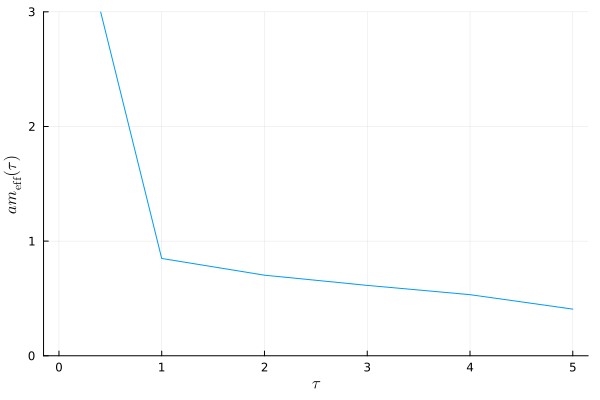

In [21]:
idx = collect(1:div(Nt,2) )
idx2=idx .+ 1
plot(xax[idx],
    -log.(Gt[idx2]./Gt[idx]), 
    label=nothing,
    xlabel=raw"$\tau$",
    ylabel=raw"$am_\mathrm{eff}(\tau)$",
    yrange=(0,3)
)

(虚時間方向が短すぎるので、減っている様子が見えていますがここは眼をつぶることにしましょう。
実際の計算では統計誤差を考慮する必要がありますし、虚時間方向はもう少し長く取るべきです。)

ざっくり、$\hat\tau=3$以降のデータを使うと、無次元化した質量は以下のように計算できます。

In [22]:
idx = collect(4:div(Nt,2)+1 ) # \tau=0がJulia では1番目のデータであることに注意。
idx2= idx .+ 1
am = mean(-log.(Gt[idx2]./Gt[idx]) )
println("am=$(round(am, digits=2))")

am=0.38


さて文献から$a$の値を求め、$m$ (次元有り)の値を求めてみよう。

[ゾンマーとネッコの論文](https://arxiv.org/abs/hep-lat/0108008) に従うと、クエンチ近似でのプラケット作用の$\beta=6/g^2=5.7$での計算は、
格子間隔$a\approx 0.17$ [fm] の計算に対応します。つまり格子の空間方向の大きさは$N_x=6$なので$aN_x=1.02$ [fm]です。

(詳しく言うと、$\beta=5.7$の計算は、
$r_0$を$r_0 \approx 0.5$ [fm] (フェルトメートル)という定数(ゾンマースケール)としたとき、
$r_0/a= 2.922$に対応します。ここでゾンマースケールはクォーク間ポテンシャルから定められる基準となる長さのスケールです。)

また、$1/a$ [MeV]というカットオフを得るためには、$\hbar c=197$ [fm MeV]という定数を使います。

In [23]:
r0_over_a=2.922 # $\beta=5.7$での次元なしの定数(r0/a)。論文(hep-lat/0108008)から。
r0 = 0.5 # fm
a = r0/r0_over_a # fm単位の格子間隔
a_inv = 197/a # MeV単位のカットオフ = 200 fm MeV/格子間隔(fm)
println("1/a=$(round(a_inv, digits=2)) MeV")

1/a=1151.27 MeV


つまりカットオフは$a^{-1} = 197/0.17 \approx 1159$ [MeV]となります。

(つまり、虚時間方向を$N_t=12$としたとき系の温度は$a^{-1}/N_t \approx 1159/12\approx 96$ [MeV]です。
慣例的にQCD相転移温度以下の計算は0温度計算とよばれることもあります。
クエンチ近似の場合のQCD相転移の温度は約200 MeVです。)

格子理論では、すべての物理量はカットオフを用いて次元を消してあるため、
逆に$1/a \approx 1159$ [MeV]を使えば測定した次元を持ったパイ中間子の質量が求められます。

In [24]:
println("mpi=$(round(a_inv*am, digits=2)) MeV")

mpi=435.5 MeV


以上の計算により、
- クエンチ近似(クォークのループ効果を無視した近似)
- カットオフ$=1/a\sim$ 1 GeV
- クォーク質量$am_q$が$1/(2(am_q+4))=0.16$

の下でパイ中間子の質量を求めることが出来ました。
正確には、積分の統計誤差を結果に伝播させるべきですが、ここでは簡単のために省略しました。

これから現実的な計算を行うには、
- $m_\pi=147$ MeV になるように$m_q$を調整 or 外挿
- カットオフを取り除く (より大きな$\beta$での計算 & 外挿)

という手続きが必要です。また今回の計算ではクォークループを落としたのでそれを取り込むにはHMCというアルゴリズムが必要となり、
現実的な計算を行うにはスーパーコンピュータでの計算が必要となります (重いパイ中間子ならパソコンでも可能)。
そしてその様な計算ができるようになれば、そのパラメータセットを用いてパイ中間子の質量以外の物理量(たとえばクォークポテンシャルや陽子や中性子質量など)を計算すると、それらは全て予言量となります。
(くりこみ理論によると、いくつかの物理量を犠牲にすることで、残りの物理量を予言として計算することができるのでした)